In [ ]:
### Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
### Raw data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
data = df.copy()
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
### Cleaning the data

print("---columns: ", list(data.columns))
print("---datatypes:\n", data.dtypes)
print("---Missing values:\n", data.isna().sum())

before = data.shape[0]
data = data.drop_duplicates()
print("duplicate rows dropped:", before - data.shape[0])


---columns:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
---datatypes:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
---Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
duplicate rows dropped: 240


In [ ]:
### Normalizing the data

Target = "quality"
features = data.drop(columns=Target).columns

X = data[Target].values.reshape(-1, 1)
y = data[features].values

std_scl = StandardScaler()

scaled_data = data.copy()

scaled_y = std_scl.fit_transform(y)
scaled_data[features] = scaled_y
scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,5
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,5
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,5
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,6
5,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.869983,0.494756,-0.983977,-0.461157,-0.407702,1.159265,-0.264277,-0.106490,0.711149,0.945435,-0.861924,6
1594,-1.215536,0.385444,-0.983977,-0.387183,0.038015,1.542281,-0.084619,-0.968269,0.904724,-0.461331,0.062574,5
1595,-1.388312,0.112167,-0.881656,-0.239233,-0.529261,2.212559,0.124983,-0.850510,1.356397,0.593744,0.709723,6
1597,-1.388312,0.631395,-0.779336,-0.387183,-0.265883,1.542281,-0.084619,-0.663167,1.679021,0.300667,-0.214775,5


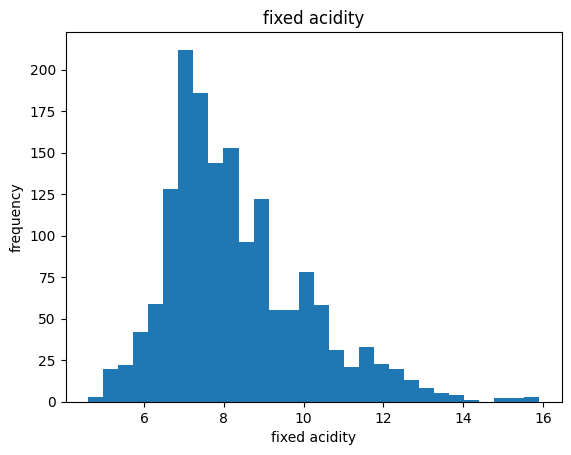

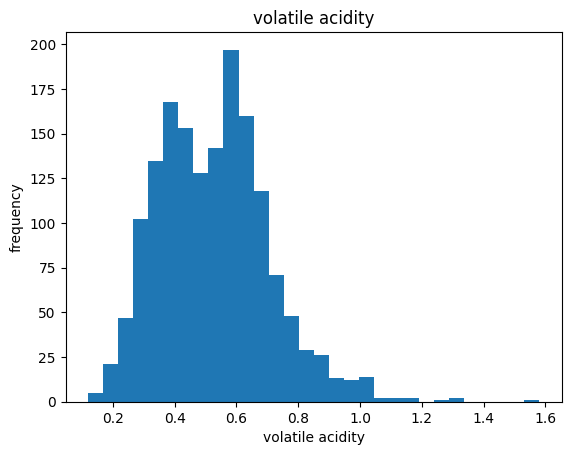

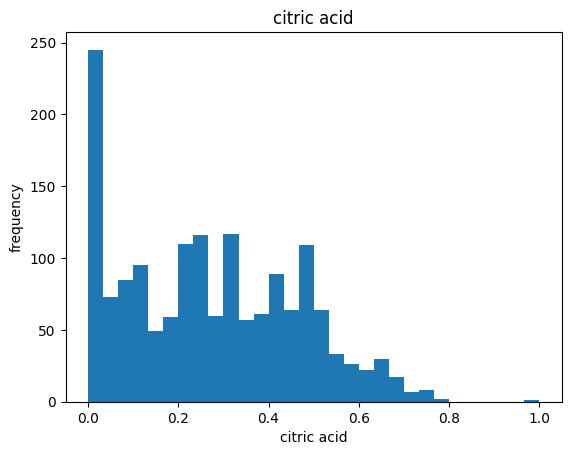

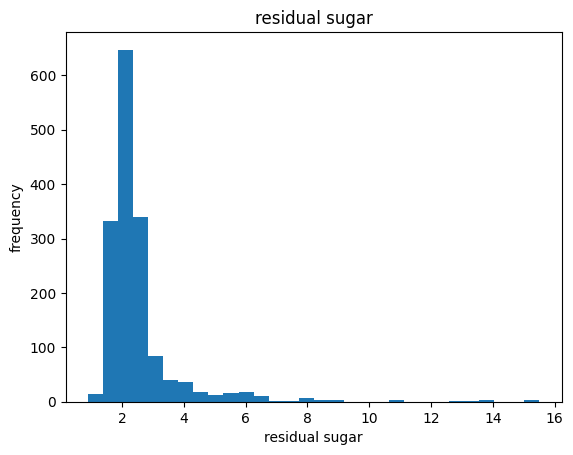

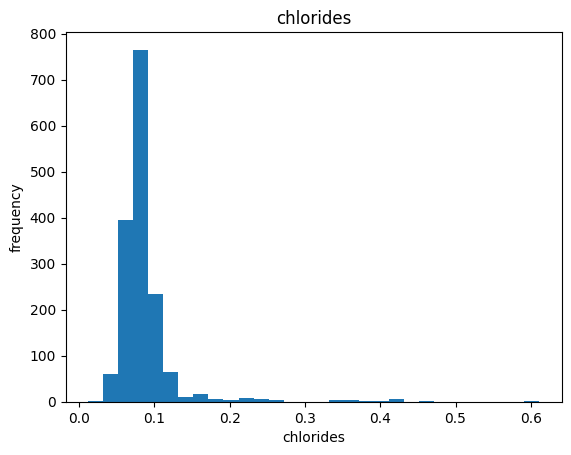

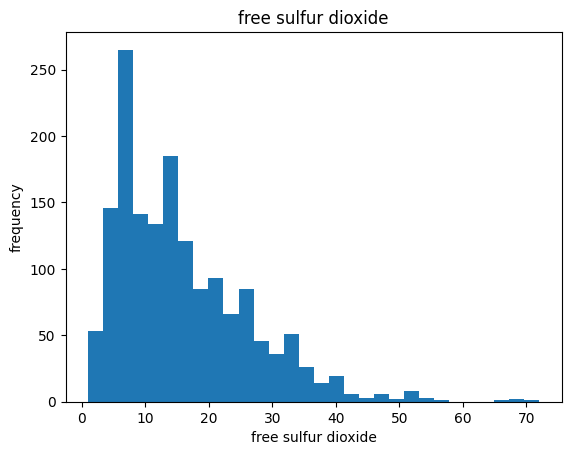

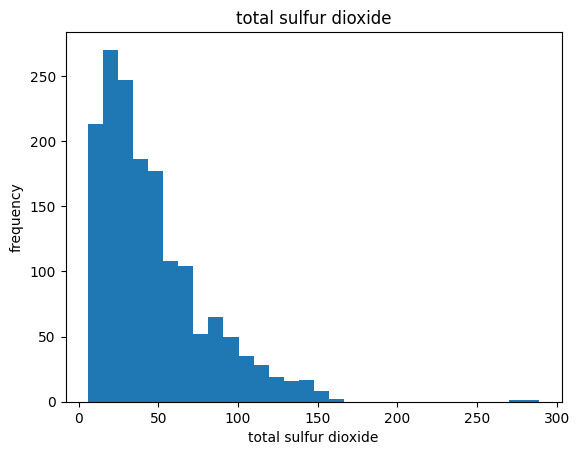

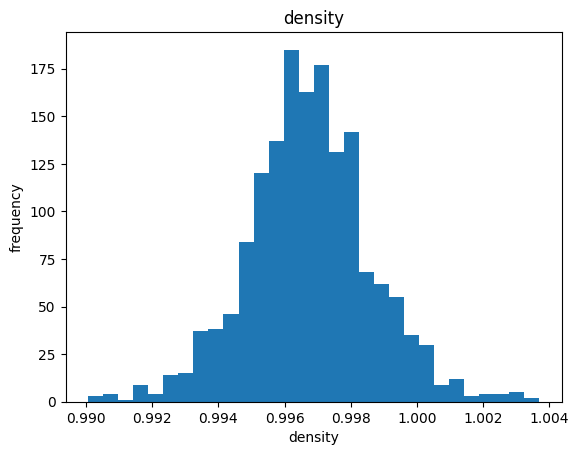

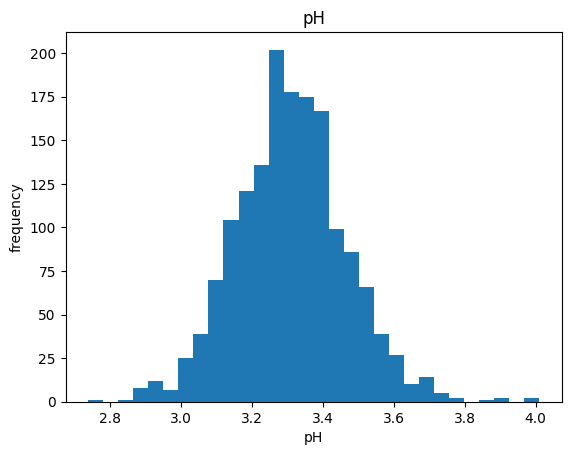

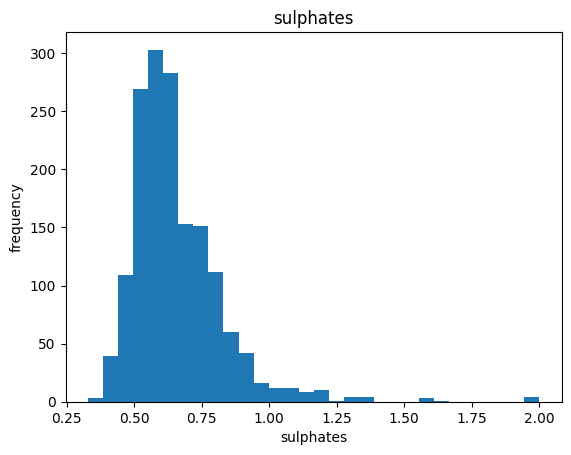

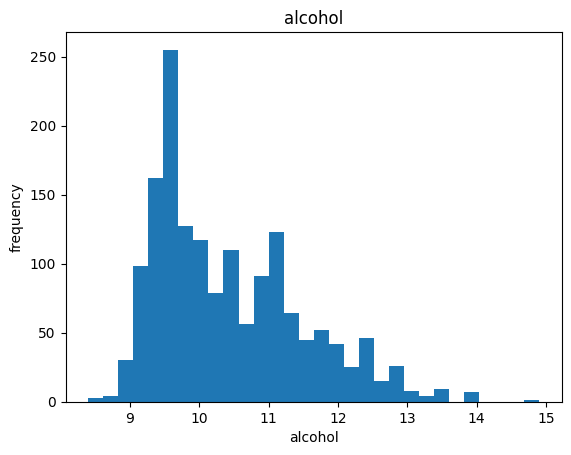

In [ ]:
### Understanding the data

for feature in features:
    plt.figure()
    plt.hist(data[feature], bins=30)      # use actual data
    plt.xlabel(feature)
    plt.ylabel("frequency")
    plt.title(f"{feature}")
    plt.show()

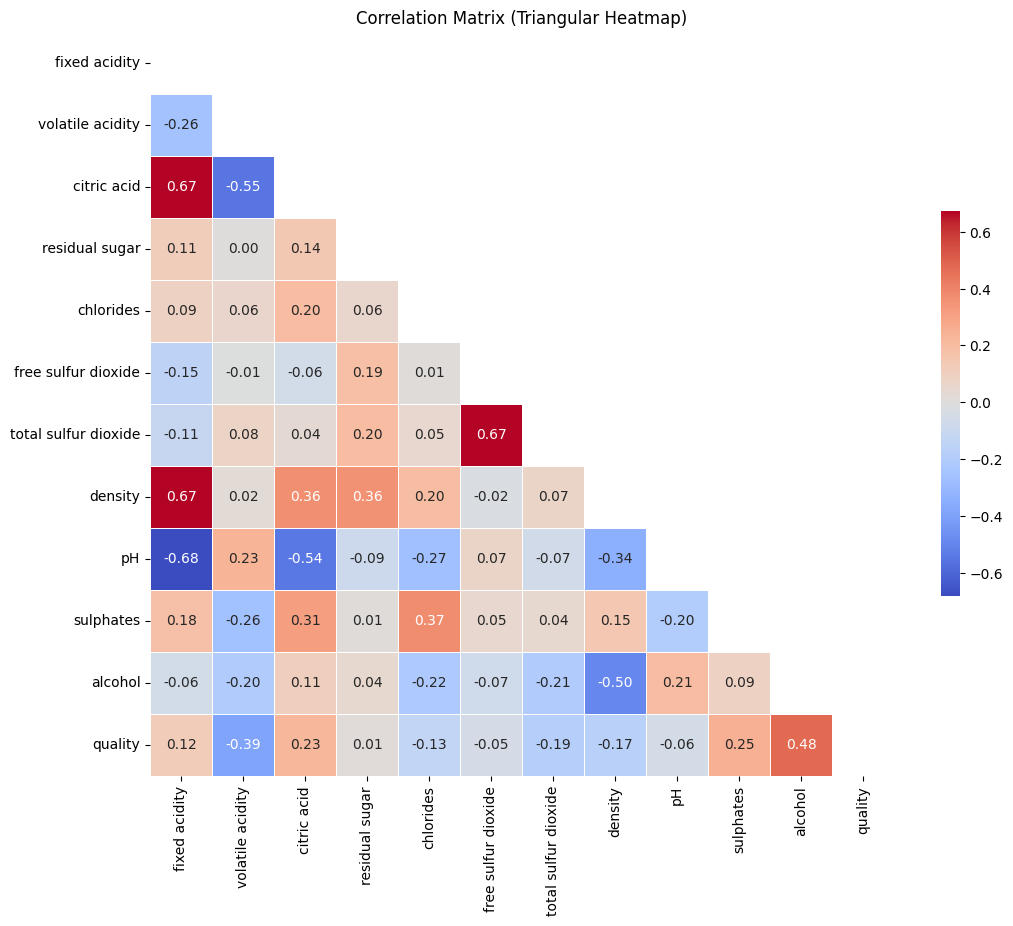

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix (Triangular Heatmap)")
plt.show()

In [ ]:
### single variable linear regression

for feature in features:
  data_tr = scaled_data.copy()

  X = data_tr[feature].values.reshape(-1, 1)    # predictors
  y = data_tr[Target].values      # target

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)

  y_pred = lin_reg.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f"Feature: {feature}")
  print(f"MAE:  {mae:.3f}")
  print(f"MSE:  {mse:.3f}")
  print(f"RMSE: {rmse:.3f}")
  print(f"R^2:  {r2:.3f}")


Feature: fixed acidity
MAE:  0.695
MSE:  0.706
RMSE: 0.840
R^2:  0.003
Feature: volatile acidity
MAE:  0.601
MSE:  0.564
RMSE: 0.751
R^2:  0.204
Feature: citric acid
MAE:  0.672
MSE:  0.667
RMSE: 0.817
R^2:  0.059
Feature: residual sugar
MAE:  0.705
MSE:  0.713
RMSE: 0.845
R^2:  -0.007
Feature: chlorides
MAE:  0.692
MSE:  0.702
RMSE: 0.838
R^2:  0.008
Feature: free sulfur dioxide
MAE:  0.701
MSE:  0.713
RMSE: 0.844
R^2:  -0.006
Feature: total sulfur dioxide
MAE:  0.675
MSE:  0.718
RMSE: 0.847
R^2:  -0.013
Feature: density
MAE:  0.677
MSE:  0.677
RMSE: 0.823
R^2:  0.044
Feature: pH
MAE:  0.709
MSE:  0.716
RMSE: 0.846
R^2:  -0.011
Feature: sulphates
MAE:  0.656
MSE:  0.641
RMSE: 0.801
R^2:  0.095
Feature: alcohol
MAE:  0.567
MSE:  0.537
RMSE: 0.733
R^2:  0.242


In [ ]:
### Training plain linear regression

data_tr = scaled_data.copy()
X = data_tr[features].values    # predictors
y = data_tr[Target].values      # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2:  {r2:.3f}")

# This result is very bad

MAE:  0.504
MSE:  0.431
RMSE: 0.657
R^2:  0.392


In [ ]:
### With gird Search

data_gd = scaled_data.copy()
X = data_gd[features].values   # predictors
y = data_gd[Target].values     # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: scaling -> polynomial features -> linear regression
pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression())
])

# Search over polynomial degree
param_grid = {
    "poly__degree": [1, 2, 3, 4, 5]   # linear, quadratic, cubic
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

# Evaluate best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

Best Params: {'poly__degree': 1}
Test MSE: 0.5041
Test MAE: 0.5041
Test R²: 0.3915


In [ ]:
# lasso and Ridge

from sklearn.linear_model import Ridge, Lasso, ElasticNet

data_lr = scaled_data.copy()
X = data_lr[features].values   # predictors
y = data_lr[Target].values     # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines
ridge_pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("ridge", Ridge(max_iter=10000))
])

lasso_pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lasso", Lasso(max_iter=10000))
])

elastic_pipe = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("elastic", ElasticNet(max_iter=10000))
])

# Hyperparameter grids
ridge_param_grid = {
    "poly__degree": [1, 2, 3],
    "ridge__alpha": [0.01, 0.1, 1.0, 10, 100]
}

lasso_param_grid = {
    "poly__degree": [1, 2, 3],
    "lasso__alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]
}

elastic_param_grid = {
    "poly__degree": [1, 2, 3],
    "elastic__alpha": [0.0001, 0.001, 0.01, 0.1, 1.0],
    "elastic__l1_ratio": [0.2, 0.5, 0.8]
}

# Grid search for Ridge
ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Grid search for Lasso
lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, scoring="r2", n_jobs=-1)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Grid search for ElasticNet
elastic_grid = GridSearchCV(elastic_pipe, elastic_param_grid, cv=5, scoring="r2", n_jobs=-1)
elastic_grid.fit(X_train, y_train)
elastic_best = elastic_grid.best_estimator_
elastic_pred = elastic_best.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_r2 = r2_score(y_test, elastic_pred)

# Print results
results_df = pd.DataFrame([
    ["Ridge", ridge_mse, ridge_r2, ridge_grid.best_params_],
    ["Lasso", lasso_mse, lasso_r2, lasso_grid.best_params_],
    ["ElasticNet", elastic_mse, elastic_r2, elastic_grid.best_params_]
], columns=["Model", "MSE", "R²", "Best Params"])

print(results_df)

# Best model
best_model = results_df.loc[results_df["R²"].idxmax()]
print("\nBest Overall Model:")
print(best_model)

        Model       MSE        R²  \
0       Ridge  0.429557  0.393586   
1       Lasso  0.425381  0.399481   
2  ElasticNet  0.425961  0.398663   

                                         Best Params  
0            {'poly__degree': 1, 'ridge__alpha': 10}  
1          {'lasso__alpha': 0.01, 'poly__degree': 1}  
2  {'elastic__alpha': 0.01, 'elastic__l1_ratio': ...  

Best Overall Model:
Model                                              Lasso
MSE                                             0.425381
R²                                              0.399481
Best Params    {'lasso__alpha': 0.01, 'poly__degree': 1}
Name: 1, dtype: object
